
# Project: Investigate a Dataset (TMDb Movies Dataset)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset**: 
>
>To complete my Data Analysis project I will be using the TMDb movie dataset.
>
>This movie dataset contains information about 10,000 movies including genres, ratings, revenue, budget, and more.
>It contains movies which are released between 1960 and 2015

> **Questions**:
<ul>
    <li>1.Which movies had most and least budgets?</li>
    <li>2.How are the budget of making a movie changed over time?</li>
    <li>3.Which movies with most and least earned revenue?</li>
    <li>4.Which movies which had most and least profit?</li>
    <li>5.Which movies with the longest and shortest runtime?</li>
    <li>6.Which average runtime of the movies?</li>
    <li>7.Is there any relationship between columns?</li>
    <li>8.In which year we had most number of profitable movies</li> 
    <li>9.What is the most frequent used Genres in Profitable Movies ?</li> 
    <li>10.Which director has the most popular movies?</li>
    <li>11.Which production companies have most movies?</li>
    <li>12.What is the most popular keywords?</li>
</ul>

In [22]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


<a id='wrangling'></a>
## Data Wrangling

> load the data, check for cleanliness, and then trim and clean this dataset for analysis.

### General Properties

In [23]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head(10)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [24]:
df.tail(10)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,...,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,...,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,...,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [25]:
rows, col = df.shape

print('There are now {} total entries in our dataset of rows and {} coloums .'.format(rows-1,col))

There are now 10865 total entries in our dataset of rows and 21 coloums .


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [27]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [28]:
#check for null values
df.isna()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
#check for number of null values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [30]:
#checking duplicated rows
df.duplicated().sum()

1

In [31]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [32]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [33]:
# the datatype of 'release_date' appears to be object, further
# investigation shows it's a string

type(df['release_date'][0])

str

### First of all:


<li>Some columns aren't needed in the analysis which i will drop ('imdb_id','cast','homepage','tagline','overview','vote_count','vote_average')</li>
<li>number of vote_count is different for all the movies, so we cannot directly conculed the popularity of the movies based on the average vote count</li>
<li>some rows have NaN values which i will drop.</li>
<li>some rows has 0 budget and revanue which i think is a missing data so i will drop them too.</li>
<li>there is only 1 duplicate row which i will drop.</li>
<li>Changing release date column from string to date format.</li>





### Data Cleaning 
### - Removing unused columns


In [34]:
#dropping unuseful columns
df.drop(labels=['imdb_id','cast','homepage','tagline','overview','vote_count','vote_average'], axis=1, inplace=True)
df.shape
df.head()

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09



### -Removing the NAN values


In [35]:
#dropping null values
df.dropna(inplace=True)
df.isna().sum()


id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### -Removing the duplicate row 


In [36]:
#check for number of duplicate row 
df.drop_duplicates(inplace=True)
sum(df.duplicated())


0

### -Changing the release date column into standard date format


In [37]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### -Replacing zero with NAN in runtime column.


In [38]:
#replacing 0 with NaN of runtime column in the dataset
df['runtime'] =df['runtime'].replace(0, np.NAN)
df['budget'] =df['budget'].replace(0, np.NAN)
df['revenue'] =df['revenue'].replace(0, np.NAN)

In [39]:
df.dropna(inplace=True)


### -Now I'm visualizing the data to get a better inderstanding of it's distributions



array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'release_date'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

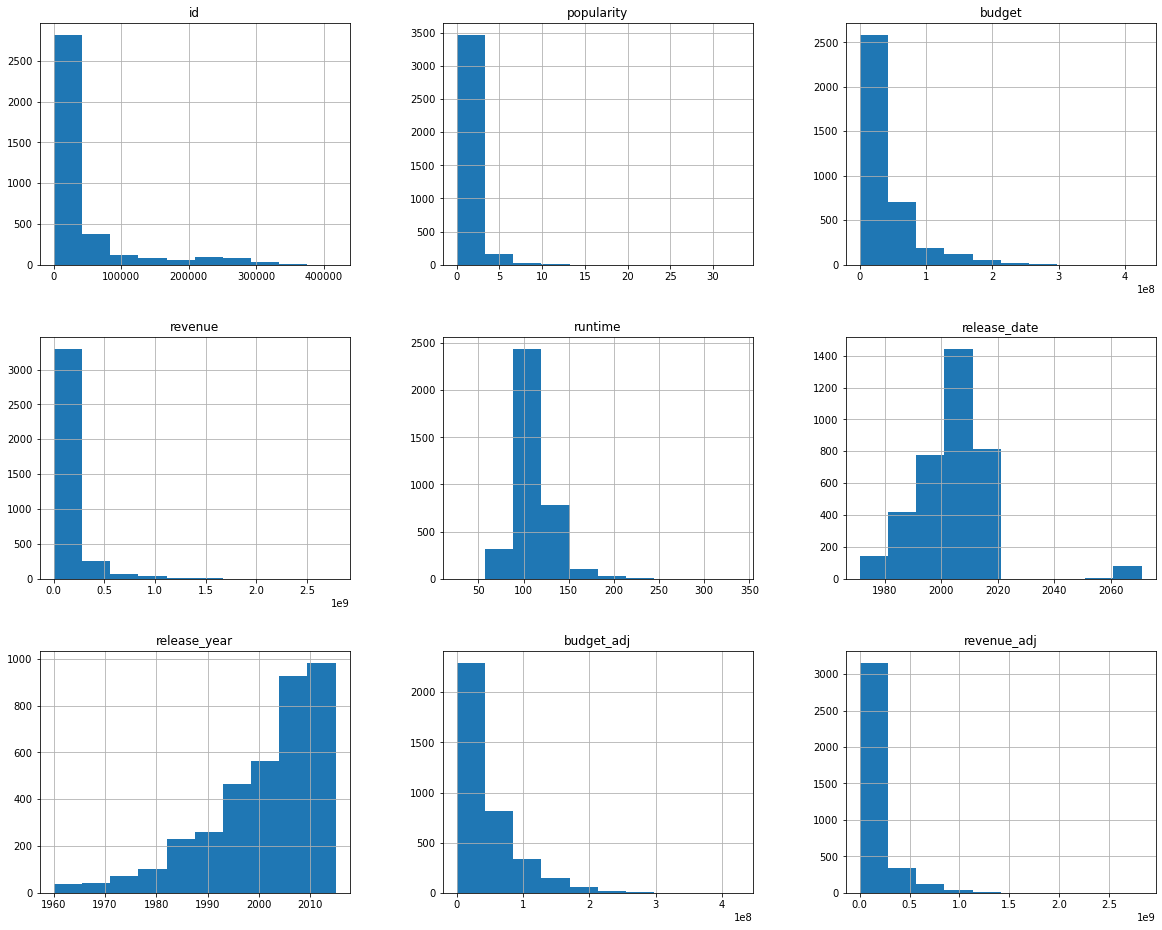

In [40]:
df.hist(figsize=(20,16))


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 : Which movies had most and least budgets?

In [41]:
import pprint

#defining the function
def calculate(column):
    #for highest value
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest value
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collecting data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('budget')

,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,425000000.0,1.0
revenue,11087569.0,100.0
original_title,The Warrior's Way,Lost & Found
director,Sngmoo Lee,Jeff Pollack
keywords,assassin|small town|revenge|deception|super speed,restaurant|neighbor|dog|ring
runtime,100.0,95.0
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


### Now we know that the movie that have the most budget is The Warrior's Way and the least is Mr. Holmes.

###  Question 2 : How are the budget of making a movie changed over time?


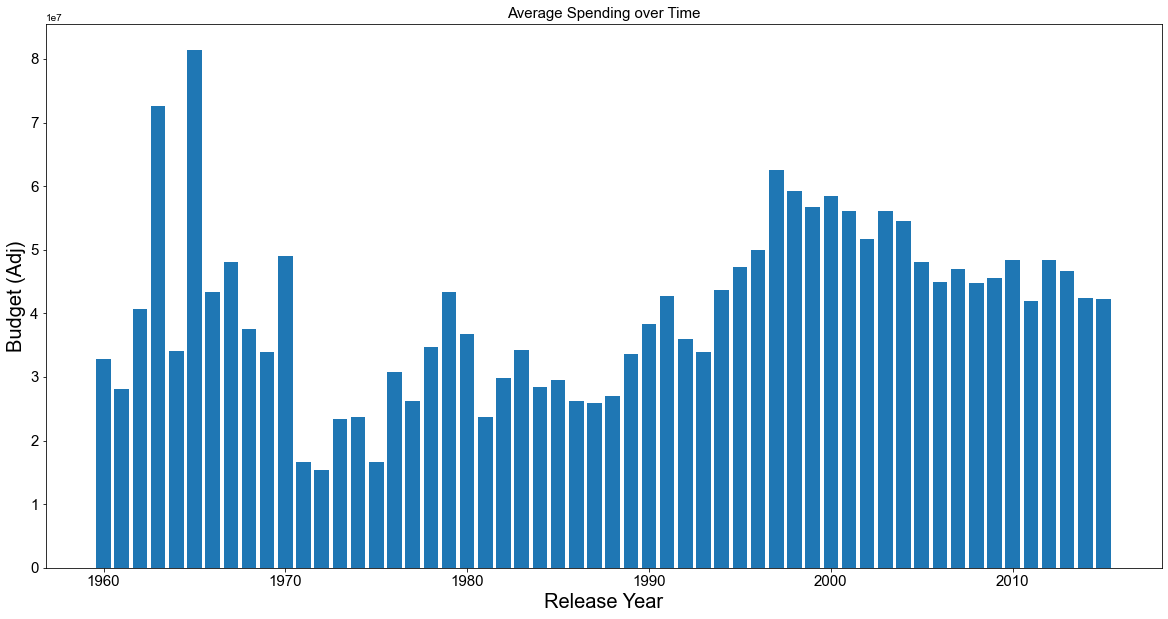

In [42]:
#defining axes x for visiualize 
x=df.groupby('release_year').budget_adj.mean().index
y=df.groupby('release_year').budget_adj.mean().values

#size of plot
plt.figure(figsize=(20,10))
plt.bar(x,y);

#x axis label
plt.xlabel('Release Year',size=20)
plt.xticks(size=15)

#y axis label
plt.ylabel('Budget (Adj)',size=20)
plt.yticks(size=15)

#plot label
plt.title('Average Spending over Time',size=15);
sns.set_style("whitegrid")


### Now we notice that the budget of making a movie changed over time from the end of the nineties to early 2000s




###  Question 3 : Which movies with most and least earned revenue?



In [43]:
# I will call the same function **calculate(column)** again for this analysis
calculate('revenue')

,1386,8142
id,19995,2293
popularity,9.432768,0.552091
budget,237000000.0,6000000.0
revenue,2781505847.0,2.0
original_title,Avatar,Mallrats
director,James Cameron,Kevin Smith
keywords,culture clash|future|space war|space colony|so...,sex|game show|slacker|comic|shopping
runtime,162.0,94.0
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Gramercy Pictures|Alphaville Films|View Askew ...


### the movie which have the most earned revenue is Avatar and the least is Wild Card.

### Question 4 : Which movies which had most and least profit?


In [44]:
#extract new feature for profit
df['profit'] = df['revenue_adj'] - df['budget_adj']

#finding movies with highest and lowest profit 

most =  pd.DataFrame(df.loc[df['profit'].idxmax()])
least = pd.DataFrame(df.loc[df['profit'].idxmin()])
df_profit = pd.concat([most, least],axis=1)
df_profit

,1329,2244
id,11,46528
popularity,12.037933,0.25054
budget,11000000.0,425000000.0
revenue,775398007.0,11087569.0
original_title,Star Wars,The Warrior's Way
director,George Lucas,Sngmoo Lee
keywords,android|galaxy|hermit|death star|lightsaber,assassin|small town|revenge|deception|super speed
runtime,121.0,100.0
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.


### the movie that have the most profit is Star Wars and the least is The Warrior's Way.

### Question 5 :  Which movies with the longest and shortest runtime?


In [45]:
calculate('runtime')


,2107,8005
id,43434,14813
popularity,0.534192,0.592219
budget,18000000.0,3000000.0
revenue,871279.0,21000000.0
original_title,Carlos,Mickey's Christmas Carol
director,Olivier Assayas,Burny Mattinson
keywords,gun|car bomb|tv mini-series|terrorism|opec,cartoon|scrooge|ghost|charles dickens|christmas
runtime,338.0,26.0
genres,Crime|Drama|Thriller|History,Family|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Walt Disney Pictures


### the movie that have the longest time is Band of Brothers and the shortest time is The Adventures of AndrÃ© and Wally B.

### Question 6  :Which average runtime of the movies?


In [46]:
df['runtime'].mean()

109.5610220168524

### The average runtime of a movie is about 103 minutes. Now I'll analyse this value from a visual perspective.



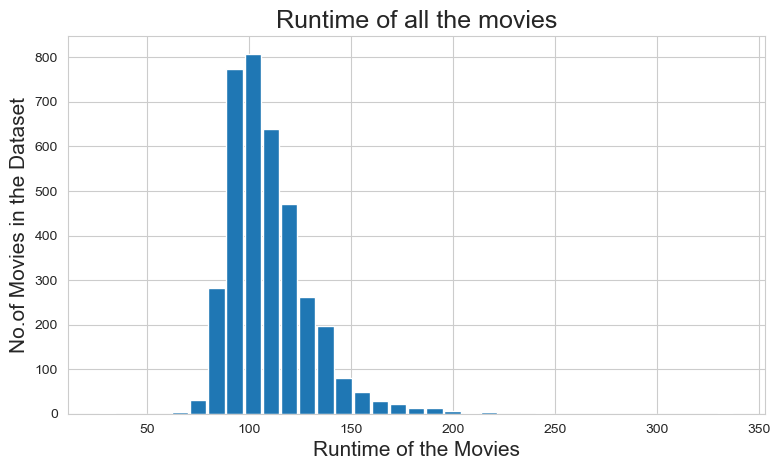

In [47]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('No.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=18)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

### Question 7:  Is there any relationship between columns?


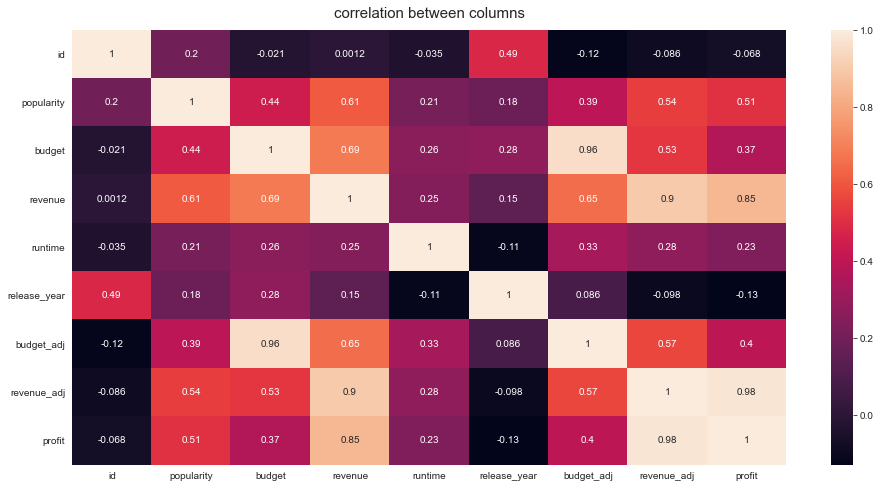

In [48]:
#correlation heatmap to find relation between columns
corr = df.corr()
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(corr,annot=True)
heatmap.set_title('correlation between columns', fontdict={'fontsize':15}, pad=12);

# I will mention just high correlated relationship between columns

* ***ID vs release_year:***
    
    It is obvious that we find a relation between them, their correlation is = 0.51
    
    
* ***Popularity vs profit:***
    
    It is obvious that we find a relation between them, movies with high popularity has high profit    
    Correlation = 0.56
    
    
* ***Popularity vs Revenue:***
    
    we can find that there is a relationship between Popularity and revenue, movies with higher popularity get            higher revenue Correlation = 0.66
    
    
* ***Revenue_adj vs profit:***
    
    It is obvious that we find a relation between them, movies with high revenue has high profit    
    Correlation = 0.98
    
    
* ***Revenue vs budget:***
    
    It is obvious that we find a relation between them, movies with high revenue has high budget    
    Correlation = 0.73
   
   
    

## Question 8 :In which year we had most number of profitable movies?

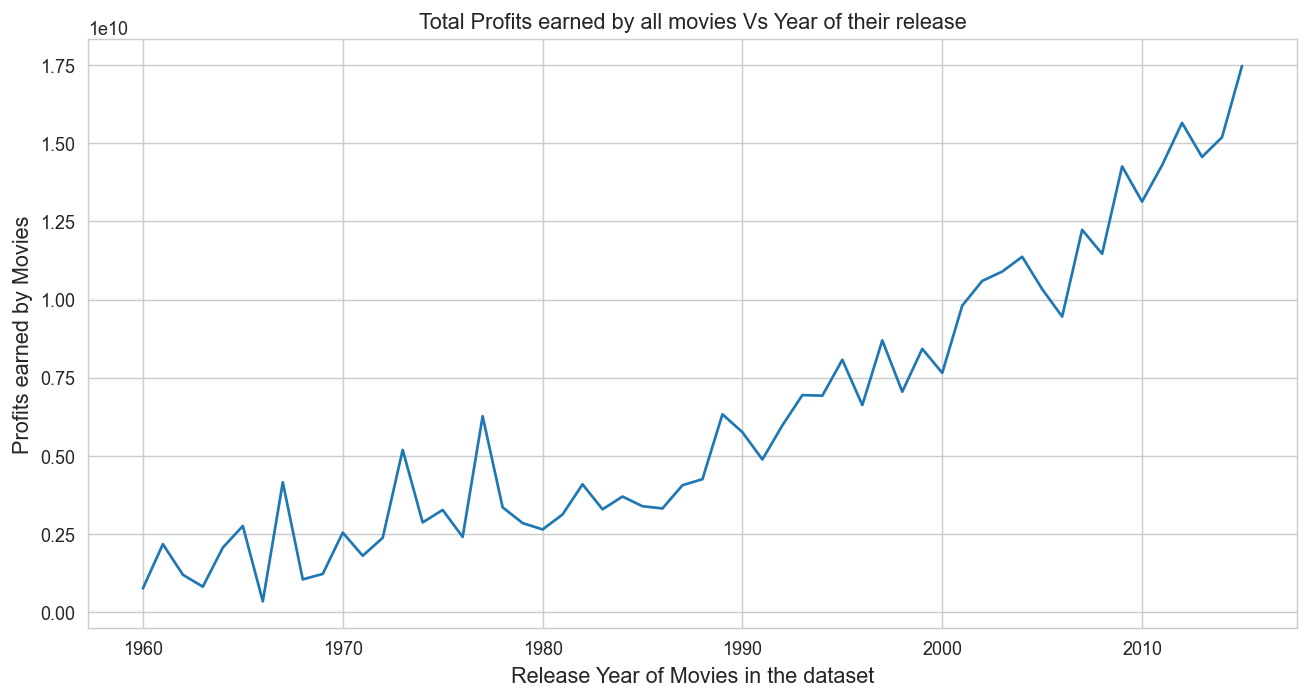

In [49]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of 
#a particular year

profits_year = df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the dataset', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Total Profits earned by all movies Vs Year of their release')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

#### Number of movies is increasing every year, dropped after 2011 and 2015 is the highest profit year.

In [50]:
# which year made the highest profit?
profits_year.idxmax()


2015

## Question 9:What is the most frequent used Genres in Profitable Movies ?

In [51]:
data = df['genres'].str.cat(sep = '|')
data = pd.Series(data.split('|'))
count = data.value_counts(ascending = False)
count.head()



Drama        1667
Comedy       1280
Thriller     1160
Action       1043
Adventure     725
dtype: int64

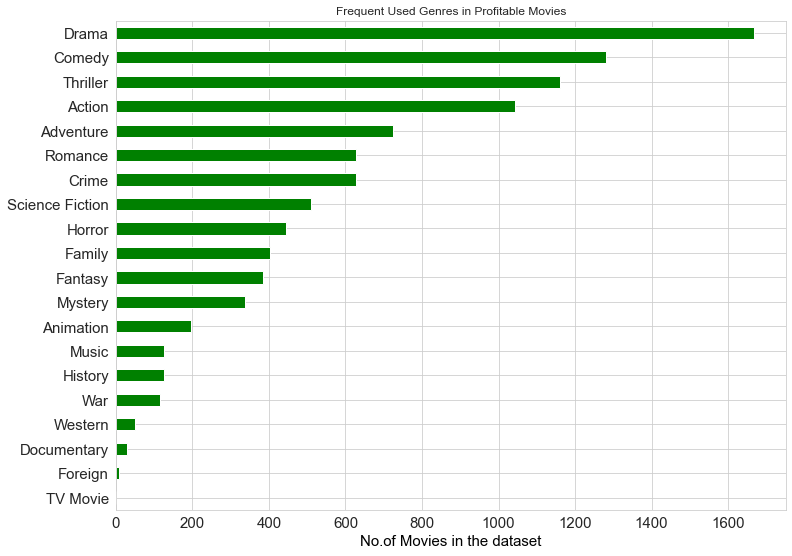

In [52]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
pt = count.plot.barh(color = 'green', fontsize = 15)

#title
pt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
pt.set_xlabel('No.of Movies in the dataset', color = 'black', fontsize = '15')

#figure size(width, height)
pt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()


### We notice that Drama is the most genre while TV movie and Foreign are the least.

## Question 10: Which director has the most popular movies?


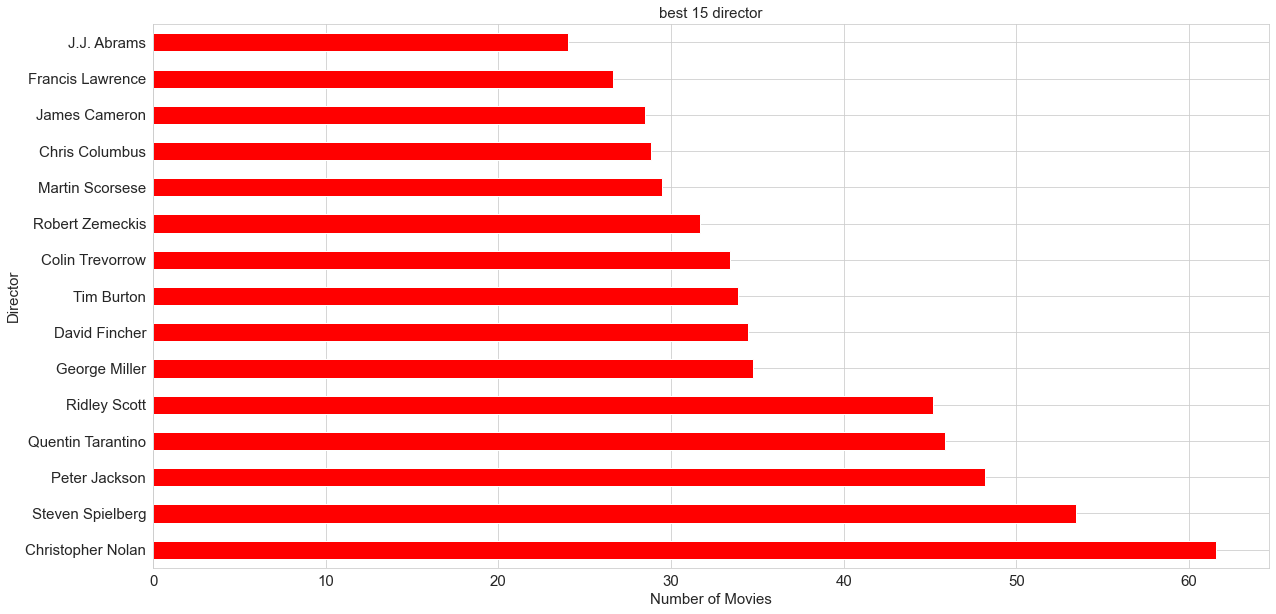

In [53]:
#group rows by directior and popularity column
director = df.groupby('director').popularity.sum().sort_values(ascending=False)[:15]
#plot with kind 'barh'
director.plot(kind= 'barh',figsize = (20,10),fontsize=15,colormap='autumn')
#plot label
plt.title("best 15 director",fontsize=15)
#x axis label
plt.xlabel('Number of Movies',fontsize=15)
#y axis label
plt.ylabel("Director",fontsize= 15)
sns.set_style("whitegrid")

### The director who has the most popular movies is Christopher Nolan.

## Question 11  : Which production companies have most movies?


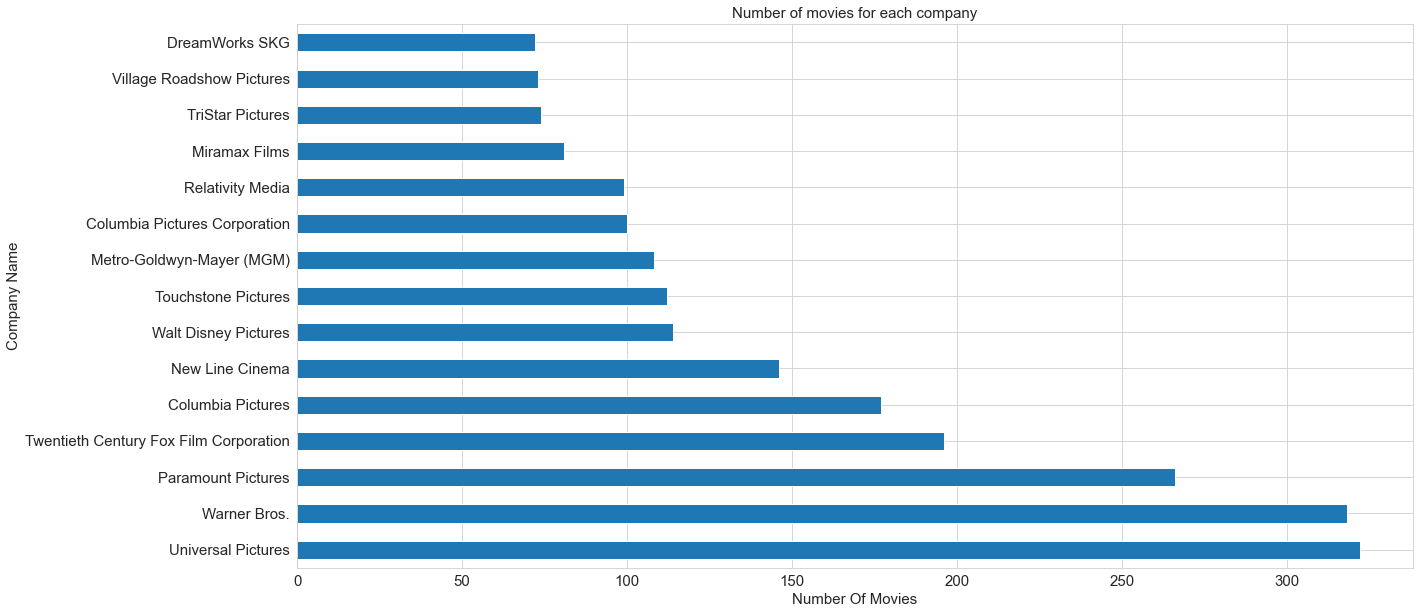

In [54]:
#link all the rows of the genres.
production_companies=df.production_companies.str.cat(sep = '|')
#split all values
data = pd.Series(production_companies.split('|')).value_counts(ascending=False)
#select first 15 value
data.iloc[:15].plot(kind='barh',figsize=(20,10),fontsize=15)
#plot label
plt.title("Number of movies for each company",fontsize=15)
#x axis label
plt.xlabel('Number Of Movies',fontsize=15)
#y axis label
plt.ylabel('Company Name',fontsize=15)
sns.set_style("whitegrid")


### The production companies have most movies is Universal Pictures and the least is Canal+.

## Question 12  : What is the most popular keywords?

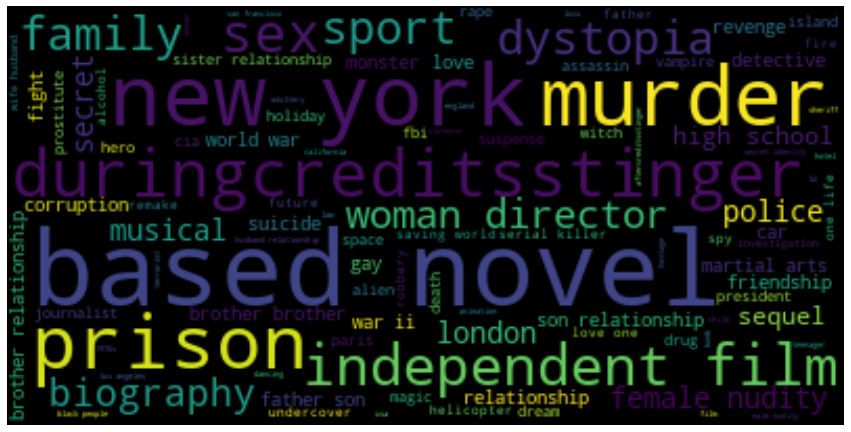

In [55]:
text = df.keywords.str.cat(sep='|')
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<a id='conclusions'></a>
## Conclusions


####  After this intersting analysis for TMDb dataset and abstract conclusions after each analysis or visualtion step here are some final thoughts:
* For a Movie in order to be considered in a successful criteria
<ol>
    <li> Budget of making movies is increasing over time. </li>
    <li> Average duration of the movie must be 103 minutes. </li>
    <li> Genre must be :Drama, Comedy, Action,Thriller,.</li>
</ol>
* Star Wars is the most profitable movie ever, The Warrior's Way is the least
* there are many relations in this dataset:
<ol>
    <li> Popularity vs Profit </li>
    <li> Popularity vs Revenue </li>
    <li> Revenue vs Profit </li>
    <li> Budget vs Revenue </li>
    <li> Popularity vs Revenue </li>
</ol>
* Number of movies is increasing every year,and the highest year of profit is 2015
* Drama is the most genre while Foreign is the least.
* Most Earning Film Production Companies are:
<ol>
    <li> Universal Picture </li>
    <li> Warner Bros </li>
    <li> Paramount Pictures </li>
    <li> twentieth Century Studios </li>
</ol>
* Directors with the most popular movies:
<ol>
    <li> Christopher Nolan </li>
    <li> Steven Spielberg </li>
    <li> Peter Jackson </li>
</ol>

## Final observation:
* This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. * This might not be completely error free but by following these suggestions one can increase the probability of a movie to become a hit. 
* Moreover we are not sure if the data provided to us is completely correct and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in.
* So an inconsistency appears here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.
* many data that was removed such as rows contained becuase they have null values or zero which refer to null too.
* It should be noted that these analysis does not imply any causation.